In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import skimage.io as io
import skimage.transform as transform
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

In [ ]:
!cp -r /content/drive/MyDrive/Wallpaper /content

In [ ]:
def foregroundAug(foreground):
    # Random rotation, zoom, translation
    angle = np.random.randint(-10,10)*(np.pi/180.0) # Convert to radians
    zoom = np.random.random()*0.4 + 0.8 # Zoom in range [0.8,1.2)
    t_x = np.random.randint(0, int(foreground.shape[1]/3))
    t_y = np.random.randint(0, int(foreground.shape[0]/3))

    tform = transform.AffineTransform(scale=(zoom,zoom),
                                rotation=angle,
                                translation=(t_x, t_y))
    foreground = transform.warp(foreground, tform.inverse)

    # Random horizontal flip with 0.5 probability
    if(np.random.randint(0,100)>=50):
        foreground = foreground[:, ::-1]
        
    return foreground

In [ ]:
def getForegroundMask(foreground):
    mask_new = foreground.copy()[:,:,0]
    mask_new[mask_new>0] = 1
    return mask_new

In [ ]:
def compose(foreground, mask, background):
    # resize background
    background = transform.resize(background, foreground.shape[:2])

    # Subtract the foreground area from the background
    background = background*(1 - mask.reshape(foreground.shape[0], foreground.shape[1], 1))

    # Finally, add the foreground
    composed_image = background + foreground
    
    return composed_image

In [ ]:
def normalize(x):
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

['image22.jpg', 'image8.jpg', 'image11.jpg', 'image10.jpg', 'image14.jpg', 'image7.jpg', 'image21.jpg', 'image17.jpg', 'image6.jpg', 'image4.jpg', 'image16.jpg', 'image0.jpg', 'image20.jpg', 'image2.jpg', 'image12.jpg', 'image18.jpg', 'image3.jpg', 'image5.jpg', 'image15.jpg', 'image9.jpg', 'image1.jpg', 'image19.jpg', 'image13.jpg']
image22.jpg


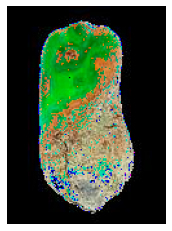

image8.jpg


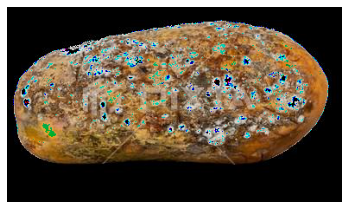

image11.jpg


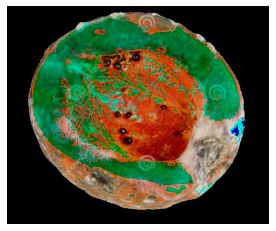

image10.jpg


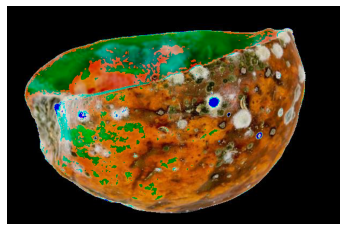

image14.jpg


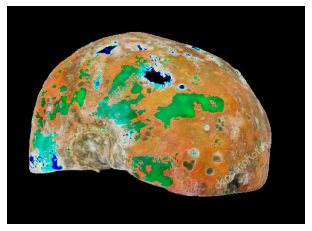

image7.jpg


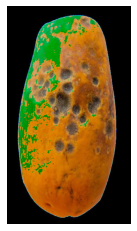

image21.jpg


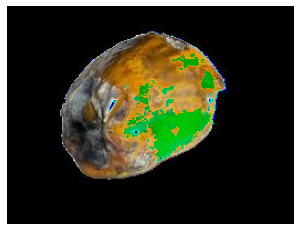

image17.jpg


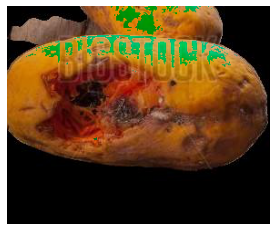

image6.jpg


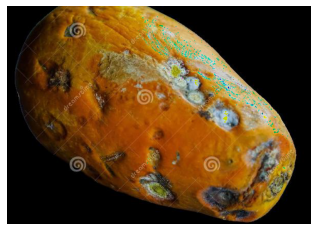

image4.jpg


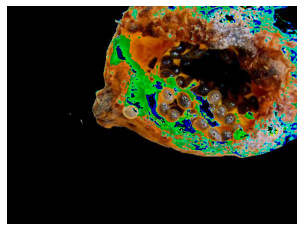

image16.jpg


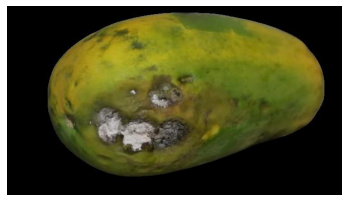

image0.jpg


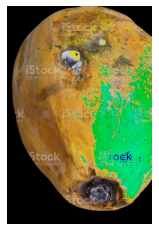

image20.jpg


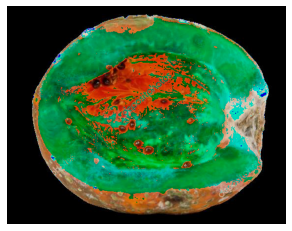

image2.jpg


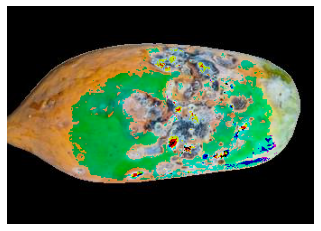

image12.jpg


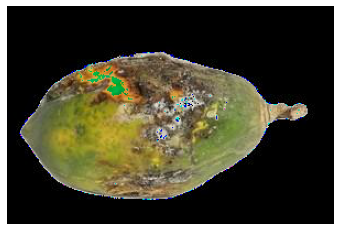

image18.jpg


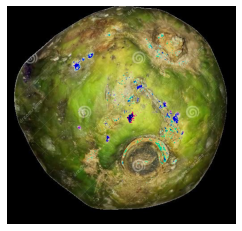

image3.jpg


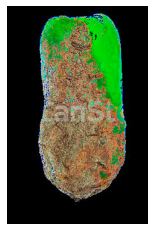

image5.jpg


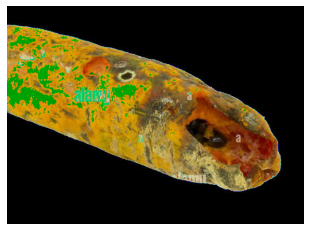

image15.jpg


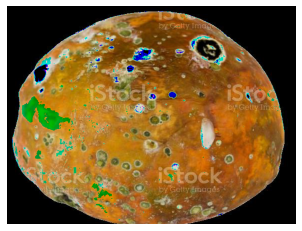

image9.jpg


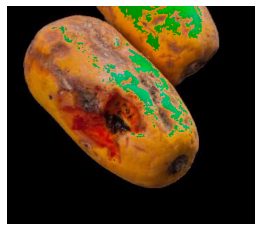

image1.jpg


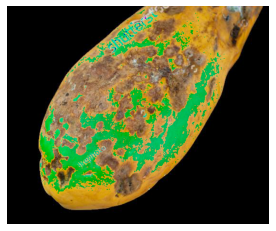

image19.jpg


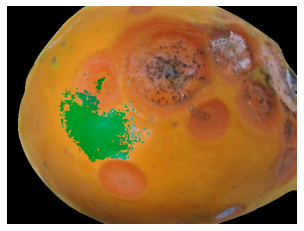

image13.jpg


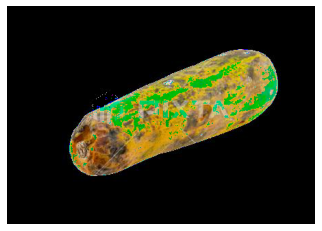

In [ ]:
# Read the image
source_dir = '/content/Raw'
image_files = os.listdir(source_dir)
print(image_files)
if ".ipynb_checkpoints" in image_files :
  image_files.remove(".ipynb_checkpoints")
for image in image_files:
  path = source_dir + '/'+ image
  I = io.imread(path)/255.0
  print(image)
# Cut out the foreground layer
  foreground = I.copy()
  foreground[foreground>=0.9]=0 # Setting surrounding pixels to zero
  plt.axis('off')
  plt.imshow(foreground)
  plt.show()

In [ ]:
# Read the image
source_dir = '/content/Raw'
image_files = os.listdir(source_dir)
backgrounds = os.listdir("/content/Wallpaper")
if ".ipynb_checkpoints" in backgrounds :
  backgrounds.remove(".ipynb_checkpoints")
if ".ipynb_checkpoints" in image_files :
  image_files.remove(".ipynb_checkpoints")
counter = 0
for image in image_files:
  path = source_dir + '/'+ image
  I = io.imread(path)/255.0
# Cut out the foreground layer
  foreground = I.copy()
  foreground[foreground>=0.9]=0 # Setting surrounding pixels to zero
  for index, background in enumerate(backgrounds):
    foreground_new = foregroundAug(foreground)
    mask_new = getForegroundMask(foreground_new)
    path = r'/content/Wallpaper' + '/'+ background
    background_file = io.imread(path)/255.0
    composed_image = compose(foreground_new, mask_new, background_file)
    output_filename = '/content/Result/' + 'output{}.jpg'.format(index + counter) 
    counter += 1
    normalized_image = normalize(composed_image)
    matplotlib.image.imsave(output_filename, normalized_image)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
!zip -r /content/file.zip /content/Result

  adding: content/Result/ (stored 0%)
  adding: content/Result/output22.jpg (deflated 1%)
  adding: content/Result/output106.jpg (deflated 1%)
  adding: content/Result/output86.jpg (deflated 1%)
  adding: content/Result/output4.jpg (deflated 0%)
  adding: content/Result/output156.jpg (deflated 0%)
  adding: content/Result/output146.jpg (deflated 0%)
  adding: content/Result/output144.jpg (deflated 2%)
  adding: content/Result/output152.jpg (deflated 1%)
  adding: content/Result/output132.jpg (deflated 0%)
  adding: content/Result/output50.jpg (deflated 1%)
  adding: content/Result/output68.jpg (deflated 0%)
  adding: content/Result/output18.jpg (deflated 0%)
  adding: content/Result/output126.jpg (deflated 1%)
  adding: content/Result/output42.jpg (deflated 2%)
  adding: content/Result/output46.jpg (deflated 1%)
  adding: content/Result/output20.jpg (deflated 1%)
  adding: content/Result/output148.jpg (deflated 1%)
  adding: content/Result/output58.jpg (deflated 1%)
  adding: content/R